In [1]:
alpha = 0.65
f(k) = k.^alpha
u(x) = log(x)
beta = 0.95

#grid for state variable k and action variable s:
grid_max = 2
grid_size = 1500
grid = linspace(1e-6, grid_max, grid_size)

linspace(1.0e-6,2.0,1500)

In [2]:
C = reshape(f(grid),grid_size,1).-reshape(grid,1,grid_size)
coord = repmat(collect(1:grid_size),1,grid_size) #coordinate matrix 
s_indices = coord[C.>0]
a_indices = transpose(coord)[C.>0]
L = length(a_indices)


1069790

In [3]:
R = u(C[C.>0]);

In [4]:
Q = spzeros(L,grid_size)

for i in 1:L
  Q[i,a_indices[i]] = 1
end

In [5]:
using QuantEcon
ddp = DiscreteDP(R, Q, beta, s_indices, a_indices);

In [6]:
results = solve(ddp, PFI);

In [7]:
v, sigma, num_iter = results.v, results.sigma, results.num_iter

num_iter

14

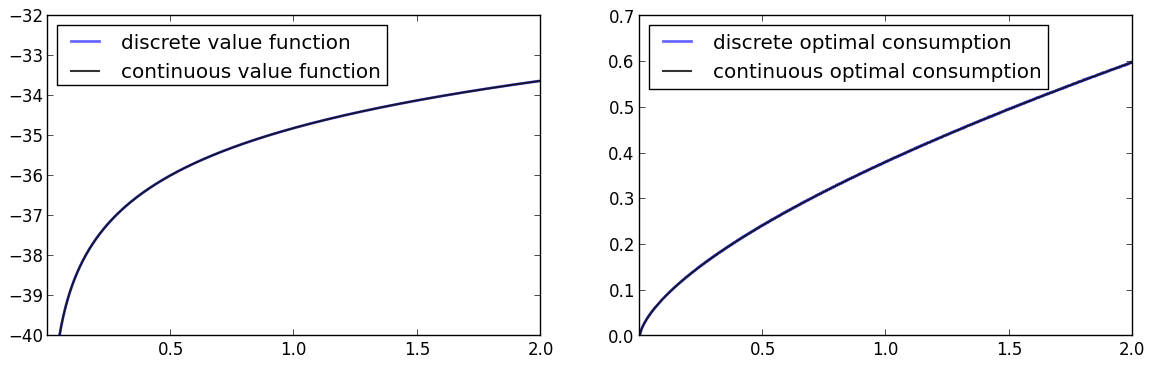

0.0013020872868430011

In [8]:
c = f(grid) - grid[sigma]

ab = alpha * beta
c1 = (log(1 - alpha * beta) + log(alpha * beta) * alpha * beta / (1 - alpha * beta)) / (1 - beta)
c2 = alpha / (1 - alpha * beta)

v_star(k) = c1 + c2 * log(k)
c_star(k) = (1 - alpha * beta) * k.^alpha

using PyPlot
fig, (ax1, ax2) = subplots(1, 2, figsize=(14, 4))


ax1[:set_ylim](-40, -32)
ax1[:set_xlim](grid[1], grid[end])
ax2[:set_xlim](grid[1], grid[end])

lb0 = "discrete value function"
ax1[:plot](grid, v, lw=2, alpha=0.6, label=lb0)
lb0 = "continuous value function"
ax1[:plot](grid, v_star(grid), "k-", lw=1.5, alpha=0.8, label=lb0)
ax1[:legend](loc="upper left")

lb1 = "discrete optimal consumption"
ax2[:plot](grid, c, "b-", lw=2, alpha=0.6, label=lb1)
lb1 = "continuous optimal consumption"
ax2[:plot](grid, c_star(grid), "k-", lw=1.5, alpha=0.8, label=lb1)
ax2[:legend](loc="upper left")

maximum(abs(v - v_star(grid)))

maximum(abs(v - v_star(grid))[2:end])

maximum(abs(c - c_star(grid)))

In [9]:
maximum(abs(v - v_star(grid)))

121.49819147053377

In [10]:
maximum(abs(v - v_star(grid))[2:end])

0.003859507678058094

In [11]:
maximum(abs(c - c_star(grid)))

0.0013020872868430011

In [12]:
cdiff = diff(c)
all(cdiff.>=0)

false

In [13]:
dec_ind = collect(1:length(c)-1)[(cdiff.<0)];

In [14]:
length(dec_ind)

521

In [15]:
maximum(abs(cdiff[dec_ind]))

0.0006535575108229663

In [16]:
all(diff(v).>=0)

true

Comparison of the solution methods
--

In [17]:
@time results = solve(ddp, PFI);

  1.497454 seconds (2.51 k allocations: 505.634 MB, 8.43% gc time)


In [18]:
@time res1 = solve(ddp, VFI, max_iter=500, epsilon=1e-4);

 12.257455 seconds (258.72 k allocations: 7.075 GB, 13.20% gc time)


In [19]:
res1.num_iter

294

In [20]:
sigma==res1.sigma

true

In [21]:
@time res2 = solve(ddp, MPFI, max_iter=500, epsilon=1e-4);

  1.890897 seconds (221.26 k allocations: 582.651 MB, 7.16% gc time)


In [22]:
res2.num_iter

16

In [23]:
sigma==res2.sigma

true

Replication of the figures
--

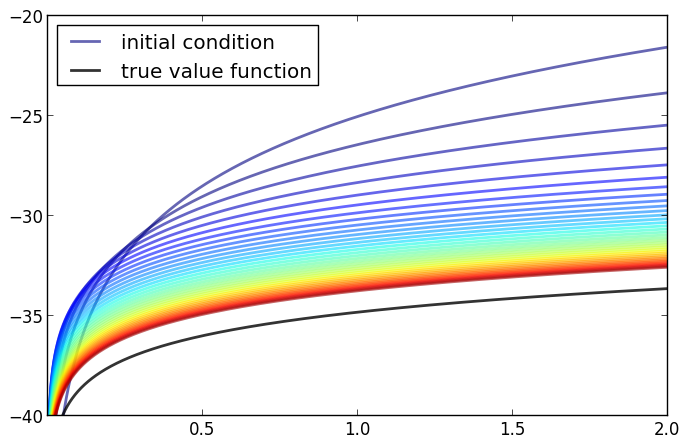

PyObject <matplotlib.legend.Legend object at 0x30e543350>

In [24]:
w = 5 * log(grid) - 25  # Initial condition
n = 35
fig, ax = subplots(figsize=(8,5))
ax[:set_ylim](-40, -20)
ax[:set_xlim](minimum(grid), maximum(grid))
lb = "initial condition"
jet = ColorMap("jet")[:__call__]
ax[:plot](grid, w, color=jet(0), lw=2, alpha=0.6, label=lb)
for i in 0:n-1
    w = bellman_operator(ddp, w)
    ax[:plot](grid, w, color=jet(i / n), lw=2, alpha=0.6)
end
lb = "true value function"
ax[:plot](grid, v_star(grid), "k-", lw=2, alpha=0.8, label=lb)
ax[:legend](loc="upper left")

Compute iterate 1 with error 6.923692228885535
Compute iterate 2 with error 4.106932416828094


Compute iterate 1 with error 6.923692228885535
Compute iterate 2 with error 4.106932416828094
Compute iterate 3 with error 3.866471747371463
Compute iterate 4 with error 3.6731481600028815


Compute iterate 1 with error 6.923692228885535
Compute iterate 2 with error 4.106932416828094
Compute iterate 3 with error 3.866471747371463
Compute iterate 4 with error 3.6731481600028815
Compute iterate 5 with error 3.4894907520027374


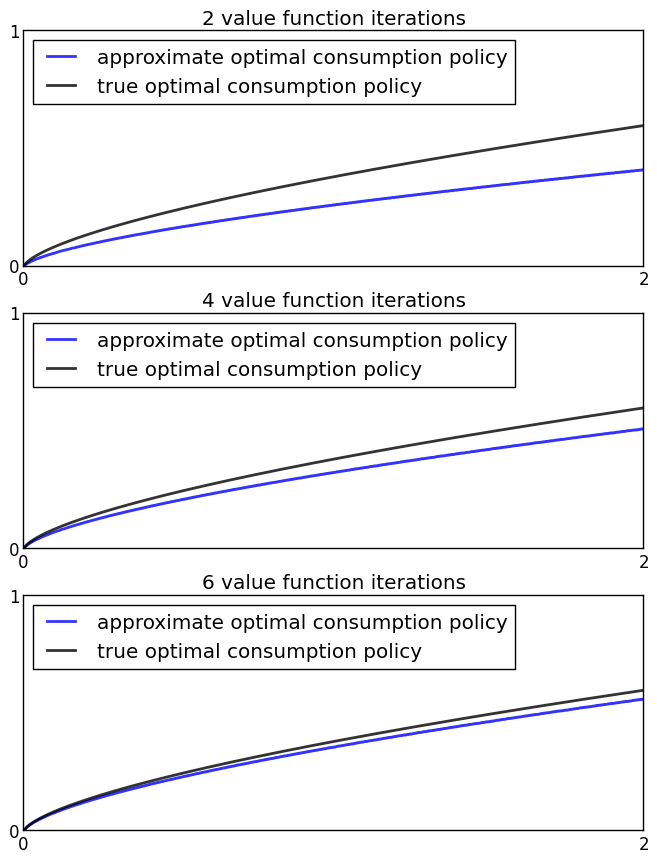

Compute iterate 6 with error 3.315016214402604


In [25]:
bellman(w) = bellman_operator(ddp,w)

fig, ax = subplots(3, 1, figsize=(8, 10))
true_c = c_star(grid)

for (i, n) in enumerate([2, 4, 6])
    w = 5 * u(grid) - 25  # Initial condition
    
    ax[i][:set_ylim](0, 1)
    ax[i][:set_xlim](0, 2)
    ax[i][:set_yticks]((0, 1))
    ax[i][:set_xticks]((0, 2))

    w = compute_fixed_point(bellman, w, max_iter=n, print_skip=1)
    sigma = compute_greedy(ddp,w)
    c_policy = f(grid) - grid[sigma]
    
    ax[i][:plot](grid, c_policy, "b-", lw=2, alpha=0.8,
               label="approximate optimal consumption policy")
    ax[i][:plot](grid, true_c, "k-", lw=2, alpha=0.8,
               label="true optimal consumption policy")
    ax[i][:legend](loc="upper left")
    ax[i][:set_title]("$n value function iterations")
end

Dynamics of the capital stock
--

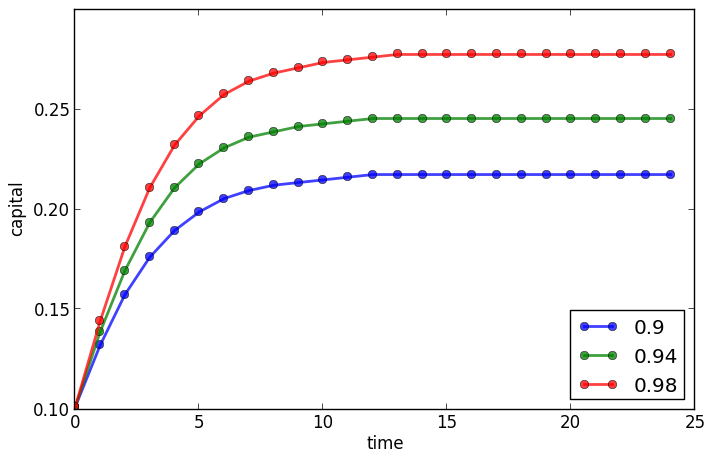

PyObject <matplotlib.legend.Legend object at 0x31ed42150>

In [26]:
discount_factors = (0.9, 0.94, 0.98)
k_init = 0.1

k_init_ind = findfirst(collect(grid).>=k_init, true)

sample_size = 25

fig, ax = subplots(figsize=(8,5))
ax[:set_xlabel]("time")
ax[:set_ylabel]("capital")
ax[:set_ylim](0.10, 0.30)

ddp0 = DiscreteDP(R, Q, beta, s_indices, a_indices)

for beta in discount_factors
    ddp0.beta = beta
    res0 = solve(ddp0,PFI)
    k_path_ind = simulate(res0.mc,sample_size,k_init_ind)
    k_path = grid[k_path_ind.+1]
    ax[:plot](k_path, "o-", lw=2, alpha=0.75, label="$beta")
end

ax[:legend](loc="lower right")